# Linear Regression Implementation

### Importing libraries

In [1]:
import numpy as na
import matplotlib.pyplot as mas
import pandas as pd

### Read the dataset


In [2]:
data=pd.read_csv("winequality-red.csv")


In [3]:
print(data.shape)
data.head

(1599, 12)


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

### storing the values of density and pH to variables A and B respectively

In [4]:
# storing A and B
A=data['density'].values
B=data['pH'].values

### Implementing Linear Regression by using statistical formulae

In [5]:
# Mean of A and B
mean_A=na.mean(A)
mean_B=na.mean(B)

#total no. of values
n=len(A)

#calculation of a1 and a2
nu=0
de=0
for i in range(n):
    nu+=(A[i]-mean_A)*(B[i]-mean_B)
    de+=(A[i]-mean_A)**2

a1=nu/de
a2=mean_B-(a1*mean_A)

#printing the regression coefficients
print(a1,a2)

-27.95146680318458 31.171644909877408


### Graphical representation

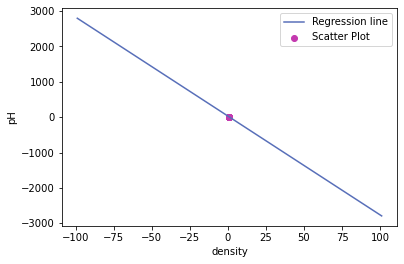

In [7]:
#plotting the values and regression line
max_A=na.max(A)+100
min_A=na.min(A)-100

#Calculate line values x and y
x=na.linspace(min_A,max_A,1000)
y=a2+a1*x

#plotting line 
mas.plot(x,y,color='#586fb9',label='Regression line')
#plotting scattered points
mas.scatter(A,B,color='#c439af',label='Scatter Plot')

mas.xlabel('density')
mas.ylabel('pH')
mas.legend()
mas.show()

### To find the coefficient of determination by using formulae


In [14]:
# to find the r^2
nu=0
de=0
for i in range(n):
    B_pred=a2+a1*A[i]
    nu+=(B_pred-mean_B)**2
    de+=(B[i]-mean_B)**2
r2=(nu/de)
print(r2)


0.11675843539253379


### Implementing Simple linear Regression using scikit lean library

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
A=A.reshape((n,1))
# Creating model
reg=LinearRegression()
# Fitting Training data
reg=reg.fit(A,B)
# B prediction
B_pred=reg.predict(A)
# Calculating r2 value
r2_val=reg.score(A,B)

print(r2_val)

0.11675843539253283
